In [1]:
import numpy as np #para manejar arreglos
from matplotlib import pyplot as plt #para graficar
from scipy.integrate import solve_ivp

plt.rcParams["figure.figsize"] = (12,8) #tamaño de los gráficos: ancho x alto

import pandas as pd

# **Modelo epidemiológico SIR**

Uno de los modelos epidemiológicos más usados es el denominado modelo SIR, que fue propuesto por W. O. Kermack y A. G. McKendrick en 1927. (Como referencia general se puede leer esto: https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology).

En una población de tamaño fijo $N$ en la que se ha desatado una epidemia que se propaga mediante contagio, en un tiempo $t$ los individuos pueden estar en tres estados distintos:

*   susceptibles $S(t)$,
*   infectados $I(t)$,
*   recuperados $R(t)$.

($S(t) + I(t) + R(t) = N$)

Los susceptibles se pueden infectar cuando entran en contacto con infectados y los infectados se recuperan con el tiempo. En este modelo una vez que los individuos se recuperan quedan son inmunes y ya no vuelven a ser susceptibles (de hecho también podemos pensar que no todos los individuos se «recuperan», sino que pueden morir a causa de la enfermedad: ambos tipos de casos están recogidos en $R(t)$, y ya no afectan al desarrollo de la epidemia). De acuerdo al comportamiento descrito, la evolución de la epidemia se modela mediante el siguiente sistema de ecuaciones diferenciales:

$$\left\{
\begin{align}
S'(t) &= -βS(t)I(t)/N\\
I'(t) &= βS(t)I(t)/N-γI(t)\\
R'(t) &= γI(t)
\end{align}
\right.
$$

En el instante inicial, el número de infectados es $I(0) = I_0$; además, $S(0) = N − I_0$ y $R(0) = 0$.

El parámetro $\beta$ es la tasa de transmisión (mide la probabilidad de que un susceptible se infecte cuando entra en contacto con un infectado). El parámetro $\gamma$ es la tasa de recuperación de la enfermedad (de tal manera que el periodo medio de recuperación es $1\gamma$), y dependiendo de cuál sea su valor el desarrollo de la epidemia (cuánto dura, el número total de infectados, en pico máximo de infectados, por ejemplo) puede ser muy distinto.

En una epidemia, un parámetro muy importante es $R_0 = \beta/\gamma$ que se denomina la «tasa básica de reproducción», y que representa el número de nuevos infectados producidos por un sólo infectado si toda la población es susceptible (esta idea se ve mejor reescribiendo $R_0 = \gamma^{-1}/\beta^{-1}$, dado que $γ^{-1}$ y $\beta^{-1}$ son el período medio de recuperación y el tiempo típico entre contactos). Cuanto más pequeño sea $R_0$, de manera más lenta evolucionará la epidemia (en la práctica, y para una epidemia real concreta, la observación de la epidemia permite medir $R_0$ y, a partir de ahí, estimar $β$).

---
---
# **Actividades**
## 1. Programar el modelo SIR en Python
Programe una función que dados los valores de $\beta$ y $\gamma$ resuelva el sistema de ecuaciones diferenciales del modelo SIR (puede utilizar `solve_ivp`). Suponga que la población está normalizada, es decir $N=1$, y que $I(0)=0.03$. Además suponga que $t$ está en el intervalo $[0,33]$.

De ahora en más, salvo que se indique lo contrario, utilice estas condiciones iniciales.

Pruebe su función para $\gamma = 0.4$ y $R_0=3$ (observar que $\beta = R_0\gamma$). Grafique el $I(t)$ obtenido.

## 2. Interpretación de los parámetros
**A)** Resuelva el sistema dejando fijo $\gamma=0.4$ y haciendo variar $R_0=0.9; 1; 1.5; 2; 2.5; 3$. Grafique para cada caso el $I(t)$ obtenido, todo en un solo gráfico.

¿Qué observa?, ¿cuál es el pico de $I(t)$ en cada?, ¿cuán rápido crece I(t) en cada caso?. A partir de lo observado, ¿cómo puede interpretar la influencia de $R_0$ en la evolución de la epidemia?

**B)** Resuelva el sistema dejando fijo $R_0=0.2$ y haciendo variar $\gamma=0.2; 0.3; 0.4; 0.5$. Grafique para cada caso el $I(t)$ obtenido, todo en un solo gráfico.

¿Qué observa?, ¿cuál es el pico de $I(t)$ en cada?, ¿cuán rápido crece I(t) en cada caso?. A partir de lo observado, ¿cómo puede interpretar la influencia de $\gamma$ en la evolución de la epidemia?

## 3. Estimación de $R_0$ a tiempos iniciales
**A)** Suponga que inicialmente se puede suponer que $S=1$, y a partir de la segunda ecuación diferencial del modelo SIR deduzca que:
$$ \ln(I) = \gamma (R_0-1)t + cte$$

**B)** En el archivo `datos.csv` se encuentra el porcentaje de infectados por gripe A durante 34 semanas en cierta región de USA (https://www.cdc.gov/flu/weekly/weeklyarchives2022-2023/data/whoAllregt_cl21.html).

Utilice las primeras 3 semanas y la ecuación del punto A) para estimar mediante cuadrados mínimos un rango para $R_0$: con $\gamma=0.2$ estime un valor y con $\gamma=0.4$ estime otro valor, para finalmente estimar un rango entre esos dos valores.

¿Por qué le parece que se sugiere utilizar solamente los datos de las primeras 3 semanas?

## 4. Ajuste del modelo SIR a los datos
Fijando $\gamma = 0.38$ haga variar $R_0$ dentro del rango obtenido en el punto anterior, para ajustar lo mejor que pueda todos los datos de `datos.csv` al $I(t)$ obtenido de resolver el modelo SIR.

Ayúdese graficando el scatter plot de los datos y el $I(t)$ en un mismo gráfico.

Para el $R_0$ elegido, grafique el scatter plot de los datos y el $I(t)$ en un mismo gráfico.

## 5. Variación del porcentaje inicial de infectados
Con los parámetros del ítem anterior, varíe $I(0)$ entre 0 y 1 de a paso $0.1$ (o $0.05$0 y grafique $S(t)$ vs. $I(t)$ obtenidos al resolver el sistema en cada caso. Grafique todo en un mismo gráfico.

¿Para cuáles valores de $S(0)$ existe un pico epidémico?

Para los valores de $S(0)$ para los cuales existe un pico epidémico, ese pico epidémico (es decir el máximo de $I(t)$) ¿se alcanza siempre para el mismo valor de $S(t)$?, ¿por qué?, ¿cuál es ese valor?

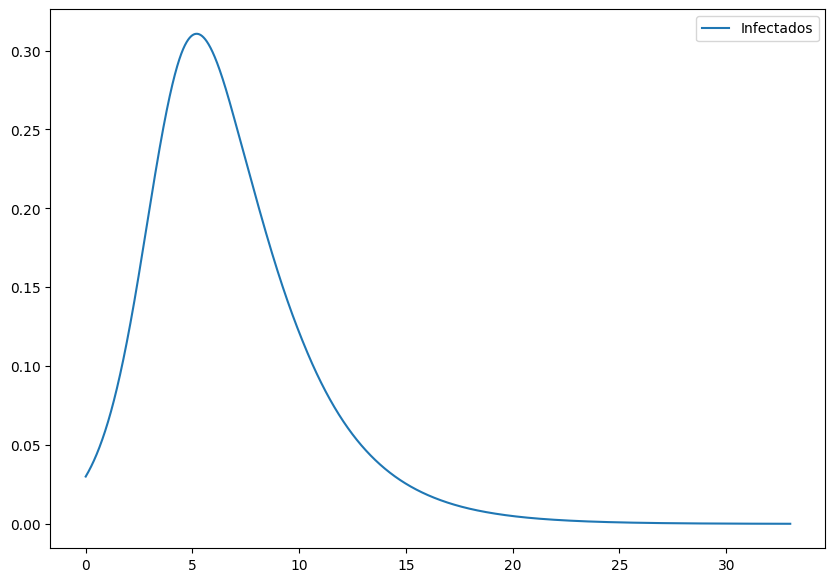

In [15]:
# 1

def f(t,z,beta,gamma,N): #z es un vector
    S, I , R = z
    dS = -beta*S*I/N
    dI = beta*S*I/N - gamma*I
    dR = gamma*I
    return np.array([dS,dI,dR])

gamma = 0.4
R = 3
beta = R*gamma

N=1
I0=0.03
S0=N-I0
R0=0

argumentos = beta, gamma, N
z0 = np.array([S0, I0, R0])

t0 = 0
tf = 33

sol = solve_ivp(f, [t0, tf], z0, args=(argumentos), dense_output=True)
vals_t = np.linspace(t0, tf, 10000)
vals_z = sol.sol(vals_t)


# Grafico I(t)
plt.plot(vals_t, vals_z[1].T, label='Infectados')
plt.legend()

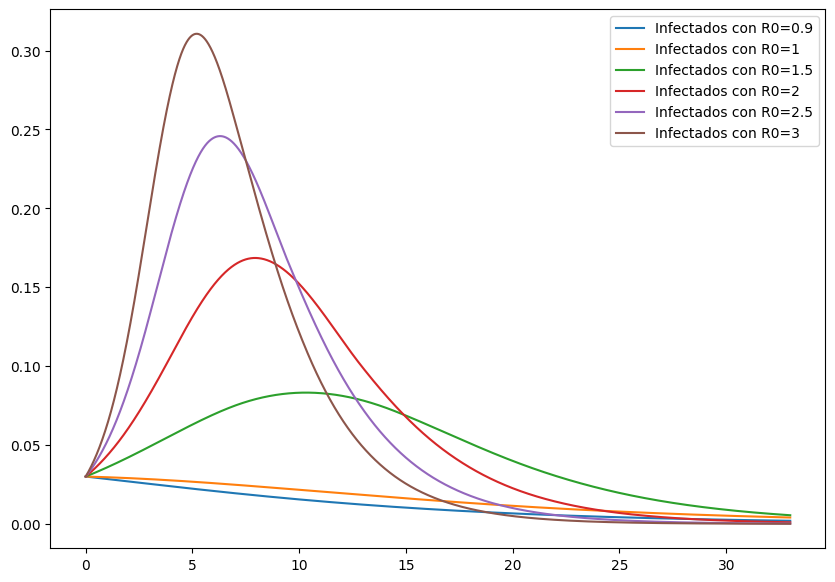

In [18]:
# 2 A
for R in [0.9, 1, 1.5, 2, 2.5, 3]:
  def f(t,z,beta,gamma,N): #z es un vector
      S, I , R = z
      dS = -beta*S*I/N
      dI = beta*S*I/N - gamma*I
      dR = gamma*I
      return np.array([dS,dI,dR])

  gamma = 0.4
  # R = 3
  beta = R*gamma

  N=1
  I0=0.03
  S0=N-I0
  R0=0

  argumentos = beta, gamma, N
  z0 = np.array([S0, I0, R0])

  t0 = 0
  tf = 33

  sol = solve_ivp(f, [t0, tf], z0, args=(argumentos), dense_output=True)
  vals_t = np.linspace(t0, tf, 10000)
  vals_z = sol.sol(vals_t)


  # Grafico I(t)
  plt.plot(vals_t, vals_z[1].T, label='Infectados con R0={}'.format(R))
plt.legend()

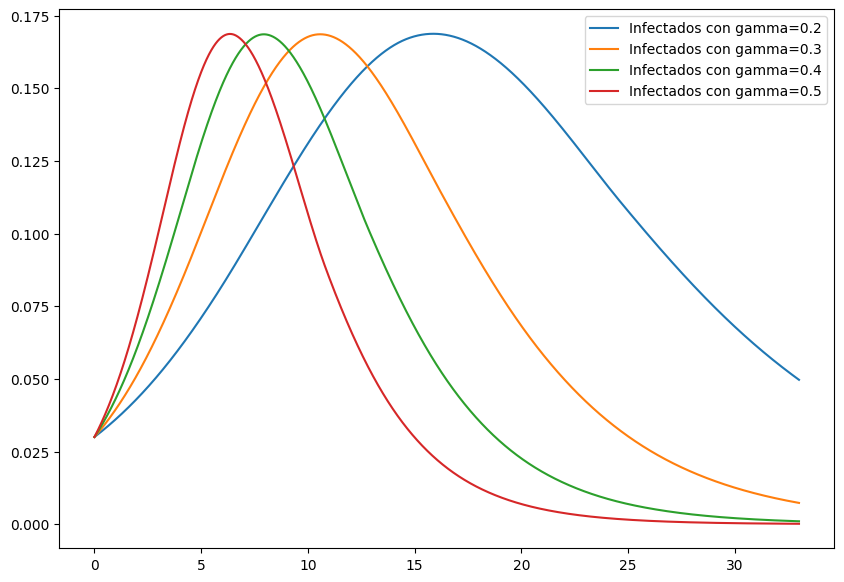

In [19]:
# 2 B
for gamma in [0.2, 0.3, 0.4, 0.5]:
  def f(t,z,beta,gamma,N): #z es un vector
      S, I , R = z
      dS = -beta*S*I/N
      dI = beta*S*I/N - gamma*I
      dR = gamma*I
      return np.array([dS,dI,dR])

  # gamma = 0.4
  R = 2
  beta = R*gamma

  N=1
  I0=0.03
  S0=N-I0
  R0=0

  argumentos = beta, gamma, N
  z0 = np.array([S0, I0, R0])

  t0 = 0
  tf = 33

  sol = solve_ivp(f, [t0, tf], z0, args=(argumentos), dense_output=True)
  vals_t = np.linspace(t0, tf, 10000)
  vals_z = sol.sol(vals_t)


  # Grafico I(t)
  plt.plot(vals_t, vals_z[1].T, label='Infectados con gamma={}'.format(gamma))
plt.legend()

In [20]:
# 3
datos = pd.read_csv('datos.csv')
datosNP = datos.to_numpy()

X1 = np.array(datosNP)
Xd = X1[:,1]/100

cant = 3
vals_t = np.arange(cant)
vals_I = Xd[:cant]
vals_ln_I = np.log(Xd[:cant])

# coeficientes por polyfit
grado = 1
# coefs = np.polyfit(vals_t, vals_ln_I, w=pesos, deg=grado)
coefs = np.polyfit(vals_t, vals_ln_I, deg=grado)

# OJO: recordar que polyfit los da en el orden inverso
b = coefs[0]

gamma = 0.2
Rep = b/gamma +1
print('R0 para gamma=0.2:', Rep)

gamma = 0.4
Rep = b/gamma +1
print('R0 para gamma=0.4:', Rep)


R0 para gamma=0.2: 3.2084632385793768
R0 para gamma=0.4: 2.1042316192896884


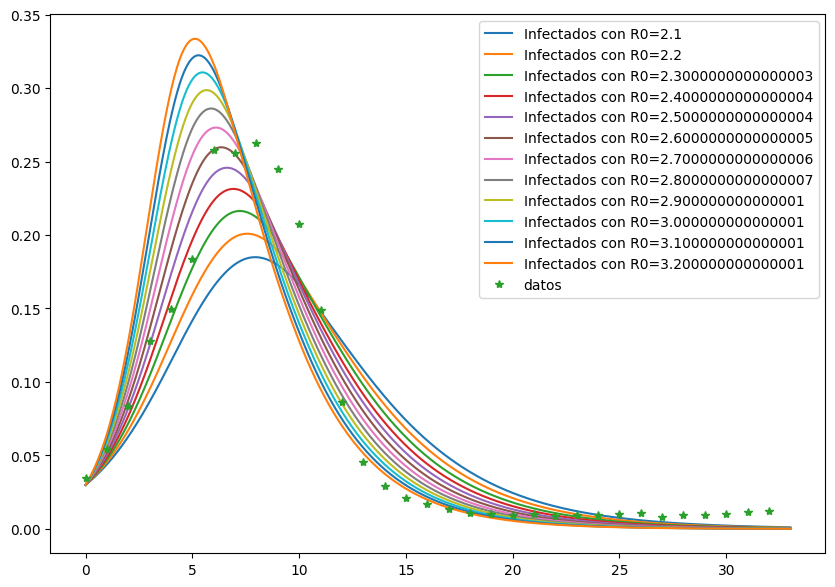

In [23]:
# 4
for R in np.arange(2.1, 3.3, 0.1):
  def f(t,z,beta,gamma,N): #z es un vector
      S, I , R = z
      dS = -beta*S*I/N
      dI = beta*S*I/N - gamma*I
      dR = gamma*I
      return np.array([dS,dI,dR])

  gamma = 0.38
  # R = 3
  beta = R*gamma

  N=1
  I0=0.03
  S0=N-I0
  R0=0

  argumentos = beta, gamma, N
  z0 = np.array([S0, I0, R0])

  t0 = 0
  tf = 33

  sol = solve_ivp(f, [t0, tf], z0, args=(argumentos), dense_output=True)
  vals_t = np.linspace(t0, tf, 10000)
  vals_z = sol.sol(vals_t)


  # Grafico I(t)
  plt.plot(vals_t, vals_z[1].T, label='Infectados con R0={}'.format(R))

plt.plot(Xd,'*', label='datos')
plt.legend()

La idea es que en el máximo de I vale I'=0, y como es el equilibro tiene que ser S = gamma/beta = R^-1


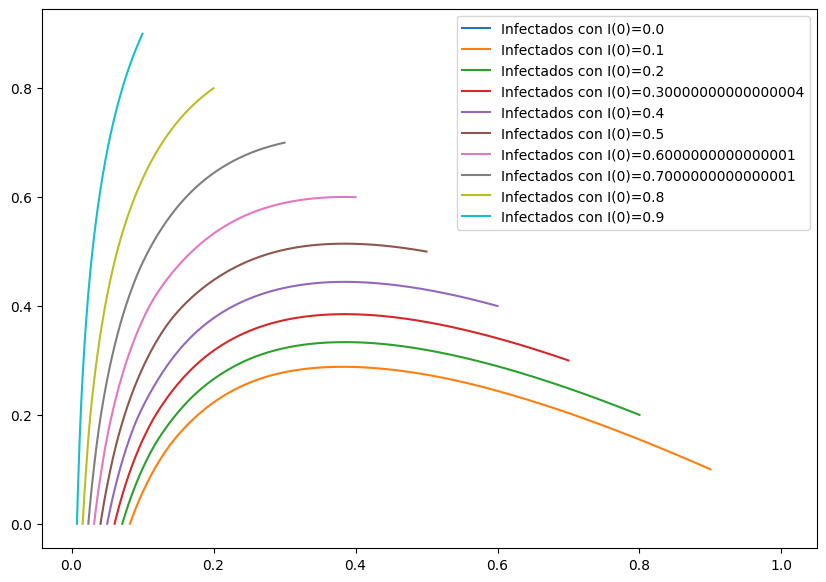

In [29]:
# 5

for I0 in np.arange(0,1,0.1):
  def f(t,z,beta,gamma,N): #z es un vector
      S, I , R = z
      dS = -beta*S*I/N
      dI = beta*S*I/N - gamma*I
      dR = gamma*I
      return np.array([dS,dI,dR])

  gamma = 0.38
  R = 2.6
  beta = R*gamma

  N=1
  # I0=0.03
  S0=N-I0
  R0=0

  argumentos = beta, gamma, N

  z0 = np.array([S0, I0, R0])

  t0 = 0
  tf = 33


  sol = solve_ivp(f, [t0, tf], z0, args=(argumentos), dense_output=True)
  vals_t = np.linspace(t0, tf, 10000)
  vals_z = sol.sol(vals_t)


  # Grafico S vs I
  plt.plot(vals_z[0].T, vals_z[1].T, label='Infectados con I(0)={}'.format(I0))
plt.legend()

print("La idea es que en el máximo de I vale I'=0, y como es el equilibro tiene que ser S = gamma/beta = R^-1")

---
---
---

# **Modelo epidemiológico Markov**

En la década de los '80 J.R Beck y colaboradores, justifican la predicción y el control del desarrollo de una epidemia mediante procesos estocásticos. Actualmente los modelos de Cadenas de Markov se utilizan casi paralelamente a los modelos tipo SIR de ecuaciones diferenciales. Por ejemplo para realizar una simulación similar a la que vimos pero incorporando la población de expuestos. En muchas enfermedades, los individuos infectados no se convierten inmediatamente en infecciosos sino que el patógeno tarda un tiempo en replicarse y establecerse en el nuevo huésped. Consideraremos entonces un modelo SEIR de ecuaciones en diferencias con una población de tamaño fijo $N$, en la que tenemos cuatro estados a tiempo $t=n$, discreto:

*   susceptibles $S(n)$,
*   expuestos $E(n)$,
*   infectados $I(n)$,
*   recuperados $R(n)$.

($S(n) + E(n) + I(n) + R(n) = N$)

Y como anteriormente pensamos el modelo SIR, los susceptibles pasan a ser expuestos cuando entran en contacto con contagiados, los expuestos pasan a ser infectados y los infectados se recuperan con el tiempo. En este modelo una vez que se recuperan, los individuos son inmunes, ya no vuelven a ser susceptibles (de hecho, también podemos pensar que no todos los individuos se «recuperan», sino que pueden morir a causa de la enfermedad: ambos tipos de casos están recogidos en $R(n)$, y ya no afectan al desarrollo de la epidemia). De acuerdo al comportamiento descripto, la evolución de la epidemia se modela mediante el siguiente modelo estocástico:

Un estado en un día $n$, $X(n)$ evoluciona a otro estado al otro día $X(n+1)$, como $X(n+1)=M.X(n)$

Es decir que para obtener el estado $X$ al día $n$ habiendo partido de un estado inicial $X_0$ debemos pensar en que $X=M^n.X_0$

Si pensamos las probabilidades de transición (probabilidades de pasar de uno a otro estado):

- a = probabilidad de pasar de suceptible a expuesto

- b = probabilidad de pasar de expuesto a infectado

- c = probabilidad de pasar de infectado a removido (o recuperado)

La matriz de transición de estados será
$$
M=
\begin{pmatrix}
1-a & 0   & 0   & 0\\
a   & 1-b & 0   & 0\\
0   & b   & 1-c & 0 \\
0   & 0   & c   & 1
\end{pmatrix}\
$$

---
---
# **Problema**
Suponga que la población total $N$ está normalizada, es decir $N=1$, y suponga que $S(0)=0.87$, $E(0)=0.1$ e $I(0)=0.03$. Además suponga que las probabilidad es de transición son $a=0.5$, $b=0.17$ y $c=0.37$.

Haga evolucionar el SEIR de Markov desde $n=0$ hasta $n=33$ y grafique, en un mismo gráfico, el modelo junto con los datos de gripe A de `datos.csv`.

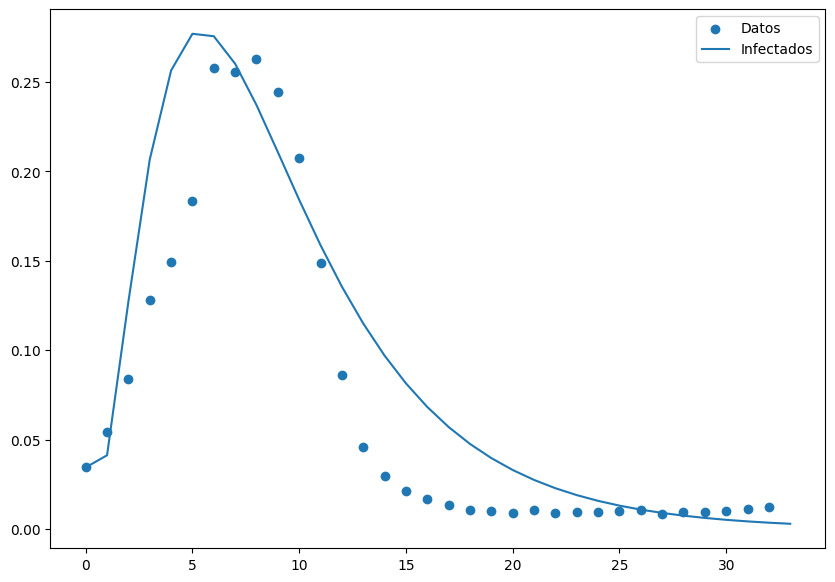

In [13]:
# Modelo

# En este código sólo muestro la dinámica de modelos tipo compartimental discreto
# estocástico para algunas supuestas probabilidades de transición entre estados

# Pensamos en un modelo SEIR como el conocido continuo (Sistema de EDOs) pero
# linealizado y pensamos en que S E I R son estados entre los que los individuos de
# una población puden pasar de uno a otro con un probabilidad fija de transición.


# Para cada paso (un día) tendremos un vector
# de la distribución de la población
# X=(suceptibles, expuestos, infectados,recuperados)


# Vector de Población inicial

S0 = 0.87
E0 = 0.1
I0 = 0.03

Xo=np.array([[S0,E0,I0,0]])

a = 0.5
b = 0.17
c = 0.37
# Construyo la matriz de transiciones Mo
Mo=np.array([[1-a,0,0,0],[a,1-b,0,0],[0,b,1-c,0],[0,0,c,1]])

# Calculo la dinámica de la epidemia para D=días

Semanas=33
X=abs(Xo)/np.linalg.norm(Xo,1) #matriz de estados dia a día

for i in range(Semanas):
    X = np.vstack((X,np.dot(Mo,X[-1,:])))

plt.scatter(np.arange(len(Xd)),Xd, label='Datos')
plt.plot(X[:,2], label="Infectados")
plt.legend()
plt.show()